<a href="https://colab.research.google.com/github/mdominguezd/PyTorch_Training/blob/main/Transform_Ready_To_Use_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O Tanzania.zip https://www.dropbox.com/scl/fi/zjf1wu4mhwnfc7r1vfrec/PlanetTanzania.zip?rlkey=43mussmeicfi26oqts7q1z9x2&dl=0

--2023-09-12 12:28:17--  https://www.dropbox.com/scl/fi/zjf1wu4mhwnfc7r1vfrec/PlanetTanzania.zip?rlkey=43mussmeicfi26oqts7q1z9x2
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/zjf1wu4mhwnfc7r1vfrec/PlanetTanzania.zip?rlkey=43mussmeicfi26oqts7q1z9x2 [following]
--2023-09-12 12:28:17--  https://www.dropbox.com/e/scl/fi/zjf1wu4mhwnfc7r1vfrec/PlanetTanzania.zip?rlkey=43mussmeicfi26oqts7q1z9x2
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccd4ca9468af3ec0540c12e4fc0.dl.dropboxusercontent.com/cd/0/inline/CDmLh0G4_SKB6mHYDFAZD-Vhnv7oN6PA8W5N9eqOvQejjJzqAQN-R8r3AbX345rMtAMcP36MnuA1QGKI4bxVk2m6hTA9YsvXEy0x8X-kLABsBd-igQCLRJIgDkDjYpTCuLuIuNoPJsuEDoyW1fxhqB5k/file# [following]
--2023-09-12 12:28:18--  https://ucc

In [91]:
import ee
import geemap
import os
import numpy as np
import geopandas as gpd
from zipfile import ZipFile
import torchvision.transforms as T
from skimage import io
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
import rasterio
from rasterio.plot import show
import shutil

In [ ]:
with ZipFile("Tanzania.zip", 'r') as zipped:
    zipped.extractall(path="./")

In [92]:
os.remove('Tanzania.zip')

In [84]:
class Tanzania_Dataset(Dataset):
  def __init__(self, img_folder): #GT_folder
    self.img_folder = img_folder

  def __len__(self):
    return len(os.listdir(self.img_folder))

  def __plot__(self, idx):
    plt.imshow(self.__getitem__(idx)[[2,1,0],:,:].permute(1,2,0))

  def __getitem__(self, idx):
    #__getitem__ asks for the sample number idx. Since we pre-loaded the images
    #and the ground truths, we just have to return the corresponding sample.
    conversion = T.ToTensor()
    img = io.imread(fname = self.img_folder + '/CroppedTanzaniaStudyArea_{:04d}'.format(idx) + '.tif').astype(np.float32)

    img = img/np.max(img)

    img = conversion(img).float()
    # img = img/np.max(img)
    # .float()
    # GT = self.GTs[idx]

    #We also need to return the ground truth as a tensor
    return img

In [85]:
tnz_DS = Tanzania_Dataset('Tanzania')

In [86]:
tnz_DS.__len__()

2993

In [ ]:
tnz_DS.__getitem__(101)

In [ ]:
tnz_DS.__plot__(101)

In [105]:
train_loader = torch.utils.data.DataLoader(dataset=tnz_DS, batch_size=4, shuffle=True)

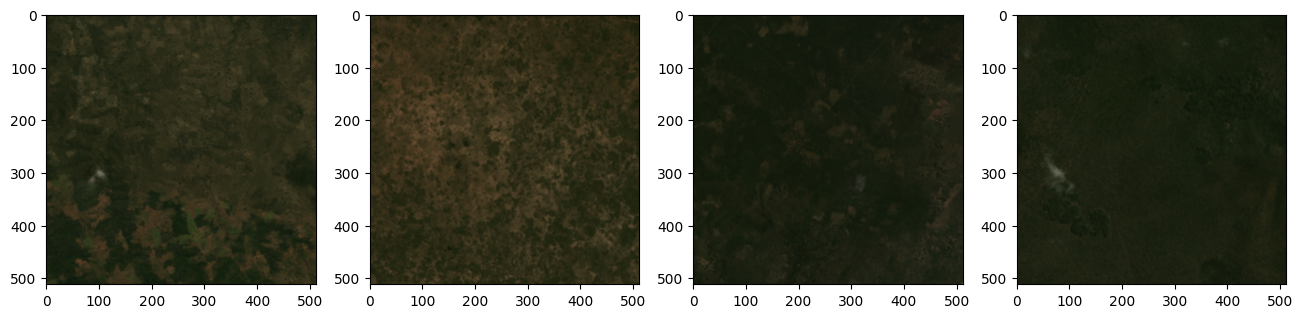

In [115]:
iter = enumerate(train_loader)
batch = next(iter)
fig, ax = plt.subplots(1,4, figsize = (16,4))
for i in range(4):
  ax[i].imshow(batch[1][i][[2,1,0],:,:].permute(1,2,0))